In [1]:
#사용될 라이브러리들을 import합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#경고 문구 무시
import warnings
warnings.filterwarnings('ignore')

#matplotlib 스타일 정의
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
airport = pd.read_csv('/content/drive/MyDrive/와이빅타/covid_impact_on_airport_traffic.csv')
airport

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


#1. imputing : null 대체

In [4]:
airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


#2. Encoding : categorical variables -> numeric화

In [5]:
airport.shape

(7247, 11)

In [6]:
#인코딩 후보군
columns = ['AggregationMethod', 'AirportName', 'Centroid', 'City', 'State', 'ISO_3166_2', 'Country', 'Geography']
for c in columns :
  print(c, airport[c].nunique())

AggregationMethod 1
AirportName 28
Centroid 28
City 27
State 23
ISO_3166_2 23
Country 4
Geography 28


'AggregationMethod'는 다 같기 때문에 모델 input에 제외. 

Airport Name, Centroid, Geography : 같은 개수 (값)
(대부분city도 유사한 값일 것)

State, ISO_3166 : 같은 개수

country 4개.


In [7]:
airport.Country.unique()

array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

Country -->  순서x ; 원핫 인코딩


In [8]:
airport_1 = pd.get_dummies(airport,columns=['Country'])

In [9]:
airport_1

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Geography,Country_Australia,Country_Canada,Country_Chile,Country_United States of America (the)
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1


In [10]:
airport_1.groupby(['AirportName'])['AirportName'].count().sort_values(ascending=False)/len(airport_1)*100

AirportName
Dallas/Fort Worth International              3.615289
Montreal Trudeau                             3.615289
Hartsfield-Jackson Atlanta International     3.615289
John F. Kennedy International                3.615289
Los Angeles International                    3.615289
Winnipeg International                       3.601490
Washington Dulles International              3.601490
Calgary International                        3.601490
Charlotte Douglas International              3.601490
Chicago OHare International                  3.601490
Daniel K. Inouye International               3.601490
Denver International                         3.601490
Detroit Metropolitan Wayne County            3.601490
Boston Logan International                   3.601490
LaGuardia                                    3.601490
McCarran International                       3.601490
Miami International                          3.601490
Newark Liberty International                 3.601490
San Francisco In

In [12]:
from sklearn.preprocessing import LabelEncoder
airport_1['AirportName'] = LabelEncoder().fit_transform(airport_1['AirportName'])
airport_1


,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Geography,Country_Australia,Country_Canada,Country_Chile,Country_United States of America (the)
0,Daily,2020-04-03,1.0,13,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
1,Daily,2020-04-13,1.0,13,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
2,Daily,2020-07-10,1.0,13,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
3,Daily,2020-09-02,1.0,13,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
4,Daily,2020-10-31,1.0,13,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,"POLYGON((151.164354085922 -33.9301772341877, 1...",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,23,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7243,Daily,2020-10-03,1.0,23,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7244,Daily,2020-07-16,1.0,23,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1
7245,Daily,2020-07-31,1.0,23,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,"POLYGON((-122.297594547272 47.434474106872, -1...",0,0,0,1


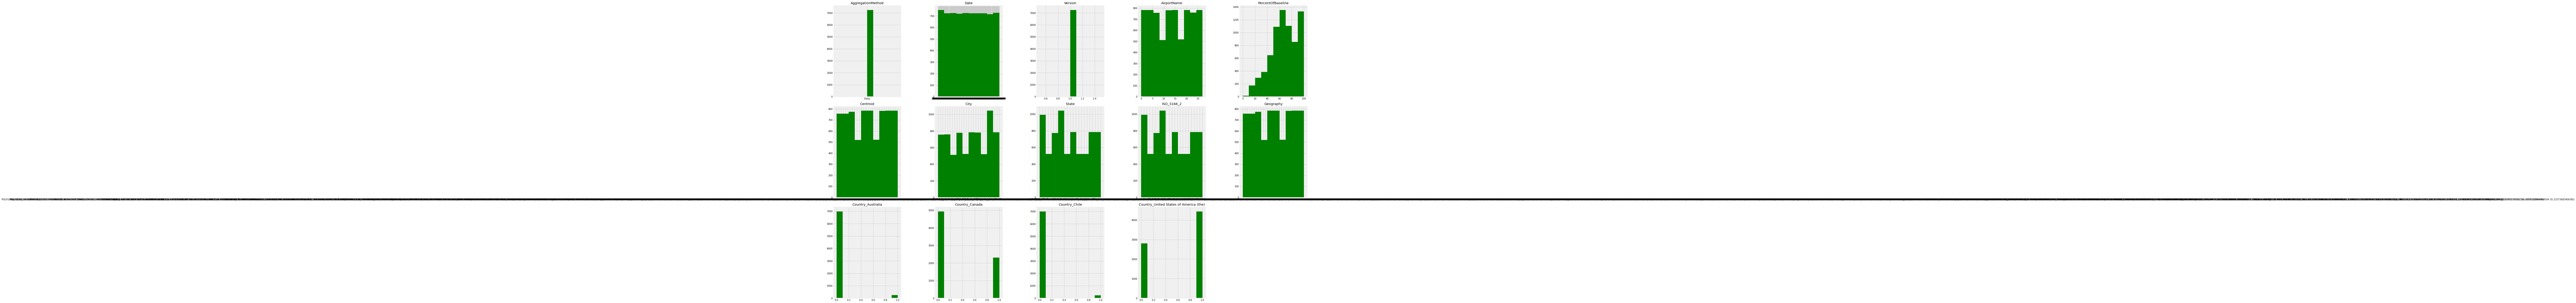

In [13]:
plt.figure(figsize=(30,30))
for i, col in enumerate(airport_1.columns.to_list()):
    plt.subplot(5, 5, i + 1)
    plt.hist(airport_1[col], label=col,color='green')
    plt.title(col)
    plt.tight_layout()

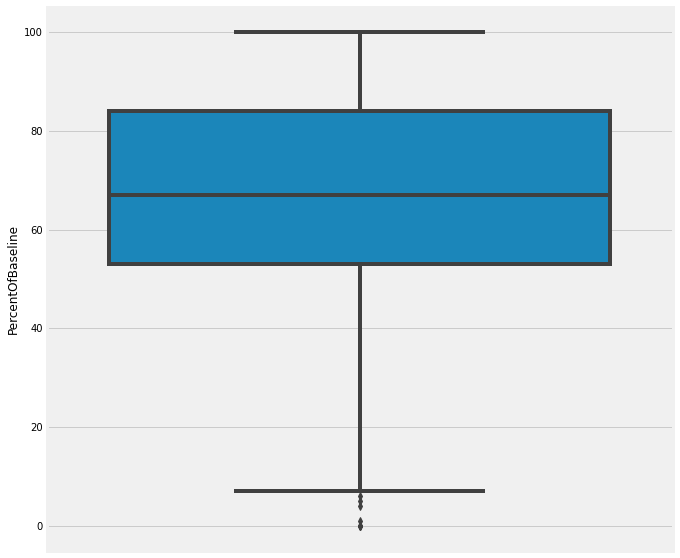

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=airport_1, y='PercentOfBaseline')

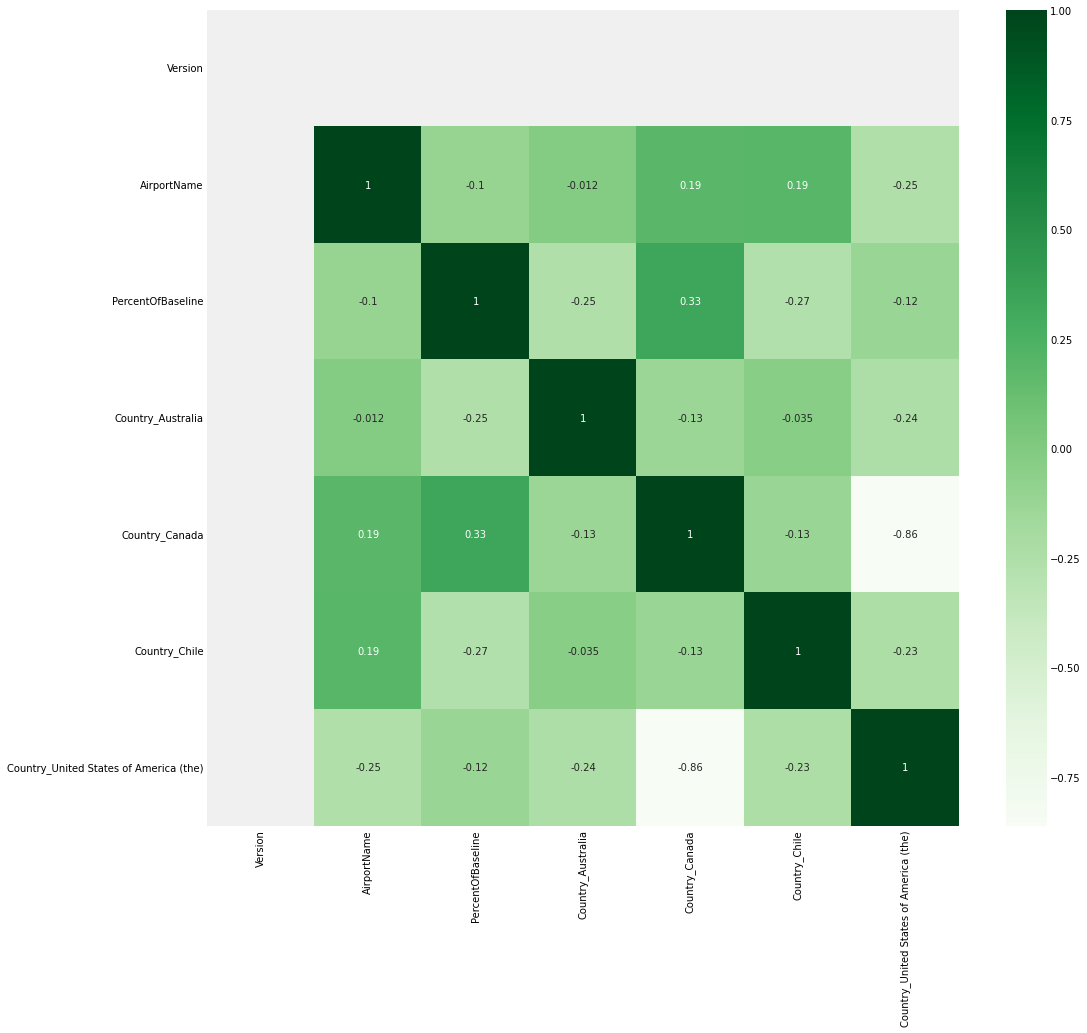

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(airport_1.corr(), annot=True, cmap='Greens')